# Data Analytics and Visualization Project


#  Group Members 
# 1. Mayank Sharma(201951092)
# 2. Anand Kumar(201952204)

# Topic: Crimes on women in India 

In [3]:
import sys
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Himani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Himani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
crimeData = pd.read_csv("crimes_against_women_2001-2014.csv")
print(crimeData)

      Unnamed: 0        STATE/UT       DISTRICT  Year  Rape  \
0              0  ANDHRA PRADESH       ADILABAD  2001    50   
1              1  ANDHRA PRADESH      ANANTAPUR  2001    23   
2              2  ANDHRA PRADESH       CHITTOOR  2001    27   
3              3  ANDHRA PRADESH       CUDDAPAH  2001    20   
4              4  ANDHRA PRADESH  EAST GODAVARI  2001    23   
...          ...             ...            ...   ...   ...   
9012        9012     LAKSHADWEEP    LAKSHADWEEP  2012     0   
9013        9013     LAKSHADWEEP          TOTAL  2012     0   
9014        9014      PUDUCHERRY       KARAIKAL  2012     6   
9015        9015      PUDUCHERRY     PUDUCHERRY  2012     7   
9016        9016      PUDUCHERRY          TOTAL  2012    13   

      Kidnapping and Abduction  Dowry Deaths  \
0                           30            16   
1                           30             7   
2                           34            14   
3                           20            17   
4  

# Showing First 5 rows of data

In [5]:

crimeData.head(5)

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


# After removing first unnamed column

In [6]:
crimeData = crimeData.iloc[:,1:]
crimeData.head(10)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,0,0,1,0,0,0
6,ANDHRA PRADESH,GUNTUR,2001,54,51,7,139,129,378,0
7,ANDHRA PRADESH,HYDERABAD CITY,2001,37,39,24,118,27,746,0
8,ANDHRA PRADESH,KARIMNAGAR,2001,56,49,62,414,81,224,0
9,ANDHRA PRADESH,KHAMMAM,2001,47,30,17,180,336,172,0


In [7]:
# Checking the size of our data
crimeData.shape

(9017, 10)

In [8]:
# Merging two columns into one single column --> Assault to modesty
crimeData["Assault_to_modesty"] = crimeData["Assault on women with intent to outrage her modesty"] + crimeData["Insult to modesty of Women"]


# Droping two previous columns which are merged above
crimeData = crimeData.drop(["Assault on women with intent to outrage her modesty","Insult to modesty of Women"],axis=1)
print(crimeData.columns)

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'Assault_to_modesty'],
      dtype='object')


In [9]:
# Renaming columns after merging
crimeData.columns=["State","District","Year","Rape","Kidnapping","Dowry_deaths","Domestic_violence","Trafficking of girls","Assault_to_modesty"]
print(crimeData.columns)

Index(['State', 'District', 'Year', 'Rape', 'Kidnapping', 'Dowry_deaths',
       'Domestic_violence', 'Trafficking of girls', 'Assault_to_modesty'],
      dtype='object')


In [10]:
crimeData.shape

(9017, 9)

In [109]:
crimeData.head(5)

,State,District,Year,Rape,Kidnapping,Dowry_deaths,Domestic_violence,Trafficking of girls,Assault_to_modesty
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,175,0,183
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,154,0,142
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,186,0,195
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,57,0,164
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,247,0,167


In [110]:
# Checking correlation with the columns
crimeData.corr()

,Year,Rape,Kidnapping,Dowry_deaths,Domestic_violence,Trafficking of girls,Assault_to_modesty
Year,1.000000,0.081295,0.152259,0.037725,0.127524,-0.015693,0.022163
Rape,0.081295,1.000000,0.684736,0.460344,0.630451,0.033516,0.600136
Kidnapping,0.152259,0.684736,1.000000,0.520405,0.555985,0.006939,0.402308
Dowry_deaths,0.037725,0.460344,0.520405,1.000000,0.390301,0.096294,0.347972
Domestic_violence,0.127524,0.630451,0.555985,0.390301,1.000000,0.017027,0.515342
Trafficking of girls,-0.015693,0.033516,0.006939,0.096294,0.017027,1.000000,-0.005975
Assault_to_modesty,0.022163,0.600136,0.402308,0.347972,0.515342,-0.005975,1.000000


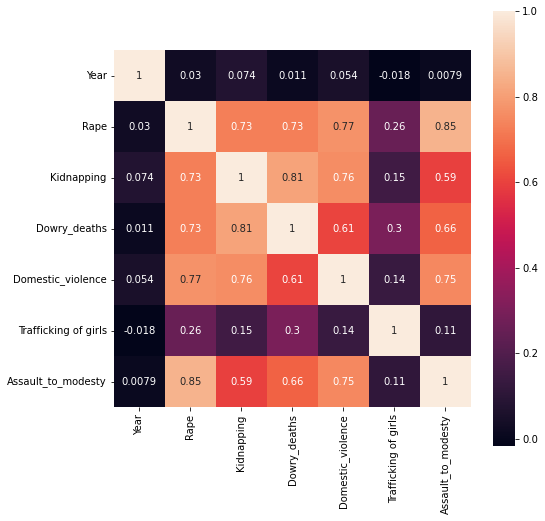

In [12]:
# Heatmap plotting
plt.subplots(figsize=(8,8))
sns.heatmap(crimeData.corr(),annot=True,square=True)
plt.show()

In [13]:
# Updating data table
crimeData = crimeData[~crimeData.District.isin(["TOTAL"]) & ~crimeData.District.str.startswith("Total")]

In [14]:
for j in crimeData.District.values:
    print(j)

ADILABAD
ANANTAPUR
CHITTOOR
CUDDAPAH
EAST GODAVARI
GUNTAKAL RLY.
GUNTUR
HYDERABAD CITY
KARIMNAGAR
KHAMMAM
KRISHNA
KURNOOL
MAHABOOBNAGAR
MEDAK
NALGONDA
NELLORE
NIZAMABAD
PRAKASHAM
RANGA REDDY
SECUNDERABAD RLY.
SRIKAKULAM
VIJAYAWADA
VIJAYAWADA RLY.
VISAKHA RURAL
VISAKHAPATNAM
VIZIANAGARAM
WARANGAL
WEST GODAVARI
CHANGLANG
DIBANG VALLEY
KAMENG EAST
KAMENG WEST
LOHIT
PAPUM PARE
SIANG EAST
SIANG UPPER
SIANG WEST
SUBANSIRI LOWER
SUBANSIRI UPPER
TAWANG
TIRAP
BARPETA
BONGAIGAON
C.I.D.
CACHAR
DARRANG
DHEMAJI
DHUBRI
DIBRUGARH
G.R.P.
GOALPARA
GOLAGHAT
GUWAHATI CITY
HAILAKANDI
JORHAT
KAMRUP
KARBI ANGLONG
KARIMGANJ
KOKRAJHAR
LAKHIMPUR
MORIGAON
N.C.HILLS
NAGAON
NALBARI
R.P.O.
SIBSAGAR
SONITPUR
TINSUKIA
ARARIA
ARWAL
AURANGABAD
BAGAHA
BANKA
BEGUSARAI
BETTIAH
BHABHUA
BHAGALPUR
BHOJPUR
BUXAR
DARBHANGA
GAYA
GOPALGANJ
JAMALPUR RLY.
JAMUI
JEHANABAD
KATIHAR
KATIHAR RLY.
KHAGARIA
KISHANGANJ
LAKHISARAI
MADHEPURA
MADHUBANI
MOTIHARI
MUNGER
MUZAFFARPUR
MUZAFFARPUR RLY.
NALANDA
NAUGACHIA
NAWADAH
PATNA
PATNA RLY.
P

DHAMTARI
DURG
GRP RAIPUR
JAGDALPUR
JANJGIR
JASHPUR
KABIRDHAM
KANKER
KORBA
KORIYA
MAHASAMUND
NARAYANPUR
RAIGARH
RAIPUR
RAJNANDGAON
SARGUJA
NORTH GOA
SOUTH GOA
AHMEDABAD COMMR.
AHMEDABAD RURAL
AHWA-DANG
AMRELI
ANAND
BHARUCH
BHAVNAGAR
DAHOD
GANDHINAGAR
HIMATNAGAR
JAMNAGAR
JUNAGADH
KHEDA NORTH
KUTCH
MEHSANA
NARMADA
NAVSARI
PALANPUR
PANCHMAHAL
PATAN
PORBANDAR
RAJKOT COMMR.
RAJKOT RURAL
SURAT COMMR.
SURAT RURAL
SURENDRANAGAR
VADODARA COMMR.
VADODARA RURAL
VALSAD
W.RLY
AMBALA
BHIWANI
FARIDABAD
FATEHABAD
GRP
GURGAON
HISSAR
JHAJJAR
JIND
KAITHAL
KARNAL
KURUKSHETRA
MAHENDRAGARH
PANCHKULA
PANIPAT
REWARI
ROHTAK
SIRSA
SONIPAT
YAMUNANAGAR
BILASPUR
CHAMBA
G.R.P.
HAMIRPUR
KANGRA
KINNAUR
KULLU
LAHAUL-SPITI
MANDI
SHIMLA
SIRMAUR
SOLAN
UNA
ANANTNAG
AWANTIPORA
BARAMULLA
BORDER
BUDGAM
CRIME JAMMU
CRIME SRINAGAR
DODA
GANDERBAL
HANDWARA
JAMMU
KARGIL
KATHUA
KULGAM
KUPWARA
LEH
POONCH
PULWAMA
RAILWAYS
RAJOURI
RAMBAN
REASI
SRINAGAR
UDHAMPUR
BOKARO
CHAIBASA
CHATRA
DEOGHAR
DHANBAD
DHANBAD RLY.
DUMKA
GARHWA
GIRIDIH
G

SUBANSIRI UPPER
TAWANG
TIRAP
UPPER DIBANG VALLEY
BARPETA
BASKA
BONGAIGAON
C.I.D.
CACHAR
CHIRANG
DARRANG
DHEMAJI
DHUBRI
DIBRUGARH
G.R.P.
GOALPARA
GOLAGHAT
GUWAHATI CITY
HAILAKANDI
JORHAT
KAMRUP
KARBI ANGLONG
KARIMGANJ
KOKRAJHAR
LAKHIMPUR
MORIGAON
N.C.HILLS
NAGAON
NALBARI
R.P.O.
SIBSAGAR
SONITPUR
TINSUKIA
UDALGURI
ARARIA
ARWAL
AURANGABAD
BAGAHA
BANKA
BEGUSARAI
BETTIAH
BHABHUA
BHAGALPUR
BHOJPUR
BUXAR
DARBHANGA
GAYA
GOPALGANJ
JAMALPUR RLY.
JAMUI
JEHANABAD
KATIHAR
KATIHAR RLY.
KHAGARIA
KISHANGANJ
LAKHISARAI
MADHEPURA
MADHUBANI
MOTIHARI
MUNGER
MUZAFFARPUR
MUZAFFARPUR RLY.
NALANDA
NAUGACHIA
NAWADAH
PATNA
PATNA RLY.
PURNEA
ROHTAS
SAHARSA
SAMASTIPUR
SARAN
SHEIKHPURA
SHEOHAR
SITAMARHI
SIWAN
SUPAUL
VAISHALI
BALRAMPUR
BILASPUR
BIZAPUR
DANTEWARA
DHAMTARI
DURG
GRP RAIPUR
JAGDALPUR
JANJGIR
JASHPUR
KABIRDHAM
KANKER
KORBA
KORIYA
MAHASAMUND
NARAYANPUR
RAIGARH
RAIPUR
RAJNANDGAON
SARGUJA
SURAJPUR
NORTH GOA
SOUTH GOA
AHMEDABAD COMMR.
AHMEDABAD RURAL
AHWA-DANG
AMRELI
ANAND
BHARUCH
BHAVNAGAR
DAHOD
GANDHINAGA

KANDHAMAL
KENDRAPARA
KEONJHAR
KHURDA
KORAPUT
MALKANGIR
MAYURBHANJ
NAYAGARH
NOWRANGPUR
NUAPADA
PURI
RAYAGADA
ROURKELA
SAMBALPUR
SONEPUR
SRP(CUTTACK)
SRP(ROURKELA)
SUNDARGARH
AMRITSAR
BARNALA
BATALA
BHATINDA
FARIDKOT
FATEHGARH SAHIB
FEROZPUR
G.R.P
GURDASPUR
HOSHIARPUR
JAGRAON
JALANDHAR
KAPURTHALA
KHANNA
LUDHIANA
MAJITHA
MANSA
MOGA
MUKTSAR
NAWAN SHAHR
PATIALA
ROPAR
SANGRUR
SAS NGR
TARN TARAN
AJMER
ALWAR
BANSWARA
BARAN
BARMER
BHARATPUR
BHILWARA
BIKANER
BUNDI
CHITTORGARH
CHURU
DAUSA
DHOLPUR
DUNGARPUR
G.R.P.
GANGANAGAR
HANUMANGARH
JAIPUR EAST
JAIPUR NORTH
JAIPUR RURAL
JAIPUR SOUTH
JAISALMER
JALORE
JHALAWAR
JHUNJHUNU
JODHPUR CITY
JODHPUR RURAL
KARAULI
KOTA CITY
KOTA RURAL
NAGAUR
PALI
RAJSAMAND
SAWAI MADHOPUR
SIKAR
SIROHI
TONK
UDAIPUR
EAST
NORTH
SOUTH
WEST
CHENNAI
CHENNAI RLY.
COIMBATORE RURAL
COIMBATORE URBAN
CUDDALORE
DHARMAPURI
DINDIGUL
ERODE
KANCHIPURAM
KANYAKUMARI
KARUR
KRISHNAGIRI
MADURAI RURAL
MADURAI URBAN
NAGAPATTINAM
NAMAKKAL
NILGIRIS
PERAMBALUR
PUDUKOTTAI
RAMNATHAPURAM
SALEM RURAL
S

JAUNPUR
JHANSI
KANNAUJ
KANPUR DEHAT
KANPUR NAGAR
KANSHIRAM NAGAR
KAUSHAMBI
KHIRI
KUSHI NAGAR
LALITPUR
LUCKNOW
MAHARAJGANJ
MAHOBA
MAINPURI
MATHURA
MAU
MEERUT
MIRZAPUR
MORADABAD
MUZAFFARNAGAR
PILIBHIT
PRATAPGARH
RAIBAREILLY
RAMPUR
SAHARANPUR
SANT KABIRNAGAR
SHAHJAHANPUR
SHRAWASTI
SIDHARTHNAGAR
SITAPUR
SONBHADRA
ST.RAVIDASNAGAR
SULTANPUR
UNNAO
VARANASI
ALMORA
BAGESHWAR
CHAMOLI
CHAMPAWAT
DEHRADUN
HARIDWAR
NAINITAL
PAURI GARHWAL
PITHORAGARH
RUDRA PRAYAG
TEHRI GARHWAL
UDHAMSINGH NAGAR
UTTARKASHI
24 PARGANAS NORTH
24 PARGANAS SOUTH
ASANSOL
BANKURA
BIRBHUM
BURDWAN
COOCHBEHAR
DAKSHIN DINAJPUR
DARJEELING
HOOGHLY
HOWRAH
HOWRAH G.R.P.
JALPAIGURI
KHARAGPUR G.R.P.
KOLKATA
MALDA
MURSHIDABAD
NADIA
PASCHIM MIDNAPUR
PURAB MIDNAPUR
PURULIA
SEALDAH G.R.P.
SILIGURI G.R.P.
UTTAR DINAJPUR
ANDAMAN
NICOBAR
CHANDIGARH
D and N HAVELI
DAMAN
DIU
CAW
CENTRAL
CRIME BRANCH
DELHI UT TOTAL
EAST
EOW
GRP(RLY)
IGI AIRPORT
NEW DELHI
NORTH
NORTH-EAST
NORTH-WEST
OUTER
SOUTH
SOUTH-EAST
SOUTH-WEST
STF
WEST
LAKSHADWEEP
KARAIKAL

SIROHI
TONK
UDAIPUR
EAST
NORTH
SOUTH
WEST
ARIYALUR
CHENNAI
CHENNAI RLY.
CHENNAISUBURBAN
COIMBATORE RURAL
COIMBATORE URBAN
CUDDALORE
DHARMAPURI
DINDIGUL
ERODE
KANCHIPURAM
KANYAKUMARI
KARUR
KRISHNAGIRI
MADURAI RURAL
MADURAI URBAN
NAGAPATTINAM
NAMAKKAL
NILGIRIS
PERAMBALUR
PUDUKOTTAI
RAMNATHAPURAM
SALEM RURAL
SALEM URBAN
SIVAGANGAI
THANJAVUR
THENI
THIRUNELVELI RURAL
THIRUNELVELI URBAN
THIRUVALLUR
THIRUVANNAMALAI
THIRUVARUR
THOOTHUGUDI
TIRUPPUR
TRICHY RLY.
TRICHY RURAL
TRICHY URBAN
VELLORE
VILLUPURAM
VIRUDHUNAGAR
DHALAI
G.R.P.
NORTH
SOUTH
WEST
AGRA
ALIGARH
ALLAHABAD
AMBEDKAR NAGAR
AURAIYA
AZAMGARH
BADAUN
BAGHPAT
BAHRAICH
BALLIA
BALRAMPUR
BANDA
BARABANKI
BAREILLY
BASTI
BIJNOR
BULANDSHAHAR
CHANDOLI
CHITRAKOOT DHAM
CSM NAGAR
DEORIA
ETAH
ETAWAH
FAIZABAD
FATEHGARH
FATEHPUR
FIROZABAD
G.R.P.
GAUTAMBUDH NAGAR
GHAZIABAD
GHAZIPUR
GONDA
GORAKHPUR
HAMIRPUR
HARDOI
HATHRAS
J.P.NAGAR
JALAUN
JAUNPUR
JHANSI
KANNAUJ
KANPUR NAGAR
KANSHIRAM NAGAR
KAUSHAMBI
KHIRI
KUSHI NAGAR
LALITPUR
LUCKNOW
MAHARAJGANJ
MAHOBA


NALANDA
NAUGACHIA
NAWADAH
PATNA
PATNA RLY.
PURNEA
ROHTAS
SAHARSA
SAMASTIPUR
SARAN
SHEIKHPURA
SHEOHAR
SITAMARHI
SIWAN
SUPAUL
VAISHALI
BALOD
BALODA BAZAR
BALRAMPUR
BEMETARA
BILASPUR
BIZAPUR
DANTEWARA
DHAMTARI
DURG
GARIYABAND
GRP RAIPUR
JAGDALPUR
JANJGIR
JASHPUR
KABIRDHAM
KANKER
KONDAGAON
KORBA
KORIYA
MAHASAMUND
MUNGELI
NARAYANPUR
RAIGARH
RAIPUR
RAJNANDGAON
SARGUJA
SUKMA
SURAJPUR
NORTH GOA
SOUTH GOA
AHMEDABAD COMMR.
AHMEDABAD RURAL
AHWA-DANG
AMRELI
ANAND
BHARUCH
BHAVNAGAR
CID CRIME
DAHOD
GANDHINAGAR
HIMATNAGAR
JAMNAGAR
JUNAGADH
KHEDA NORTH
KUTCH (EAST(G))
KUTCH (WEST-BHUJ)
MEHSANA
NARMADA
NAVSARI
PALANPUR
PANCHMAHAL
PATAN
PORBANDAR
RAJKOT COMMR.
RAJKOT RURAL
SURAT COMMR.
SURAT RURAL
SURENDRANAGAR
TAPI
VADODARA COMMR.
VADODARA RURAL
VALSAD
W.RLY AHMEDABAD
W.RLY VADODARA
AMBALA RURAL
AMBALA URBAN
BHIWANI
FARIDABAD
FATEHABAD
GRP
GURGAON
HISSAR
JHAJJAR
JIND
KAITHAL
KARNAL
KURUKSHETRA
MAHENDRAGARH
MEWAT
PALWAL
PANCHKULA
PANIPAT
REWARI
ROHTAK
SIRSA
SONIPAT
YAMUNANAGAR
BADDIPOLICEDIST
BILASPUR
C

# Grouping the data statewise 

In [15]:
d2 = crimeData.groupby(["State"])[["Rape","Kidnapping","Dowry_deaths","Domestic_violence", "Trafficking of girls","Assault_to_modesty"]].sum()
d2 = d2.reset_index()
print(d2)

                State   Rape  Kidnapping  Dowry_deaths  Domestic_violence  \
0       A & N ISLANDS    109          77             6                121   
1      ANDHRA PRADESH  13479       14936          6215             119007   
2   ARUNACHAL PRADESH    500         558             2                167   
3               ASSAM  16178       22920          1276              39388   
4               BIHAR  13124       19389         13548              25680   
5          CHANDIGARH    281         534            42                807   
6        CHHATTISGARH  11838        2630          1142               9573   
7        D & N HAVELI     56          94             1                 38   
8         DAMAN & DIU     20          15             3                 35   
9               DELHI  12848       31300          3164              30422   
10                GOA    350         164            19                191   
11            GUJARAT   4249       12918           502              59431   

# Bar Plot Analysis Of Various Crimes Statewise

# 1. Rapes

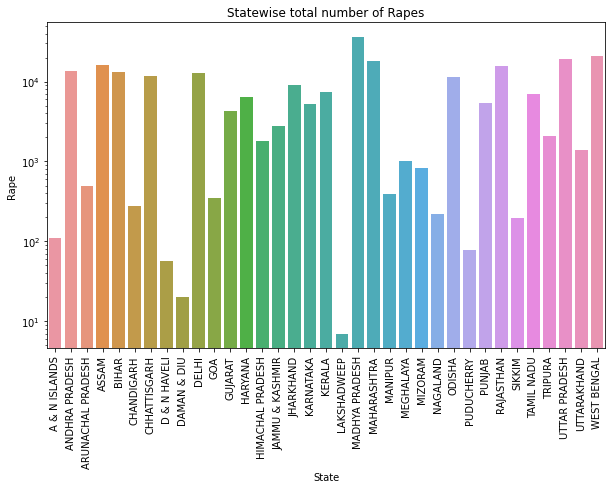

In [17]:
plt.figure(figsize = (10,6))
ms = sns.barplot(x="State",y="Rape",data=d2)
plt.title("Statewise total number of Rapes")
ms.set_xticklabels(ms.get_xticklabels(), rotation=90)
ms.set_yscale("log")

# 2. Domestic Voilence

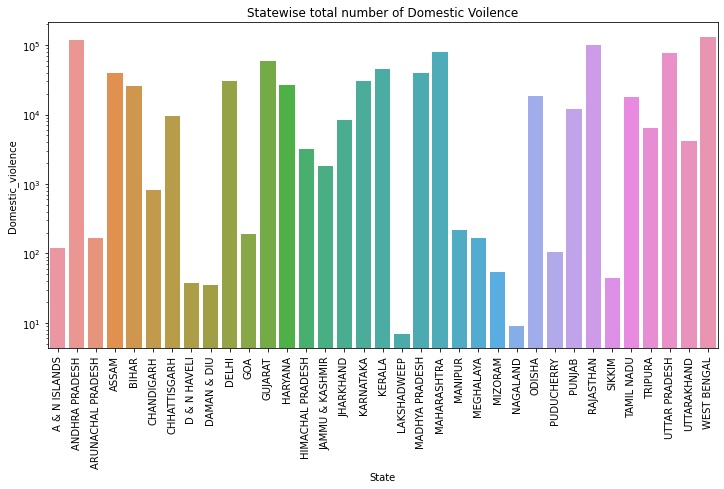

In [18]:
plt.figure(figsize = (12,6))
ms = sns.barplot(x="State",y="Domestic_violence",data=d2)
plt.title("Statewise total number of Domestic Voilence")
ms.set_xticklabels(ms.get_xticklabels(), rotation=90)
ms.set_yscale("log")

# Top 5 states in Domestic Violence

Text(0.5, 1.0, 'Top 5 states in Domestic Violence')

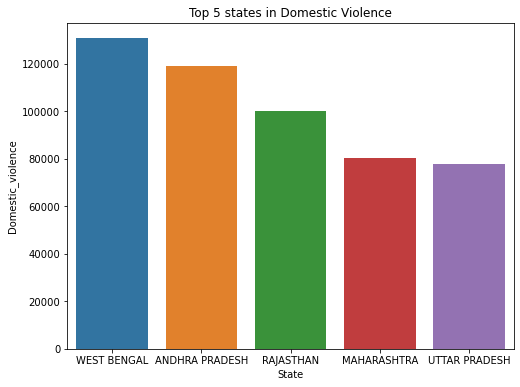

In [59]:
sorted_df = d2.sort_values(by=["Domestic_violence"], ascending=False)
#print(sorted_df)
d3 = sorted_df.head(5)
#print(d3)
plt.figure(figsize = (8,6))
ms = sns.barplot(x="State",y="Domestic_violence",data=d3)
plt.title("Top 5 states in Domestic Violence")
#ms.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ms.set_yscale("log")

# Analysis of other crimes in the above five states

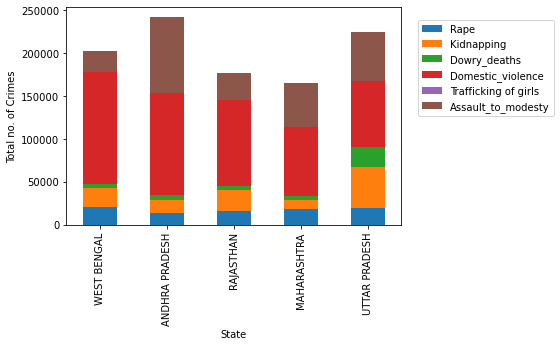

In [60]:
d3.set_index("State", inplace=True)
d3.plot(kind='bar', stacked=True)
plt.ylabel("Total no. of Crimes")
plt.legend(loc=(1.05,0.5))

In [61]:
# Calculating statewise Total no. of crimes Between 2001 to 2012

sCrime = crimeData.groupby(["State"])[["Rape","Kidnapping","Dowry_deaths","Domestic_violence", "Trafficking of girls","Assault_to_modesty"]].sum().sum(axis=1)
sCrime.head(15)

State
A & N ISLANDS           570
ANDHRA PRADESH       241784
ARUNACHAL PRADESH      2029
ASSAM                 93502
BIHAR                 79983
CHANDIGARH             2121
CHHATTISGARH          46078
D & N HAVELI            243
DAMAN & DIU              90
DELHI                 96178
GOA                    1175
GUJARAT               87463
HARYANA               56292
HIMACHAL PRADESH      10681
JAMMU & KASHMIR       29067
dtype: int64

In [62]:
d1= pd.DataFrame(sCrime.reset_index())
d1

,State,0
0,A & N ISLANDS,570
1,ANDHRA PRADESH,241784
2,ARUNACHAL PRADESH,2029
3,ASSAM,93502
4,BIHAR,79983
5,CHANDIGARH,2121
6,CHHATTISGARH,46078
7,D & N HAVELI,243
8,DAMAN & DIU,90
9,DELHI,96178


In [63]:
d1.columns = ["State","Total_crime"]

In [64]:
d1

,State,Total_crime
0,A & N ISLANDS,570
1,ANDHRA PRADESH,241784
2,ARUNACHAL PRADESH,2029
3,ASSAM,93502
4,BIHAR,79983
5,CHANDIGARH,2121
6,CHHATTISGARH,46078
7,D & N HAVELI,243
8,DAMAN & DIU,90
9,DELHI,96178


<AxesSubplot:ylabel='Total_crime'>

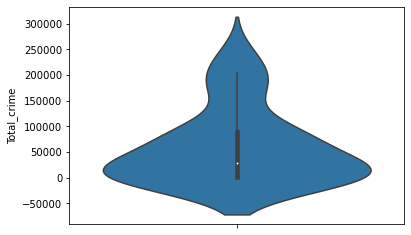

In [93]:
#sns.histplot(data=d1, x="Total_crime",bins=15,kde=True)
#sns.boxplot(y=d1["Total_crime"])
sns.violinplot(y=d1["Total_crime"])

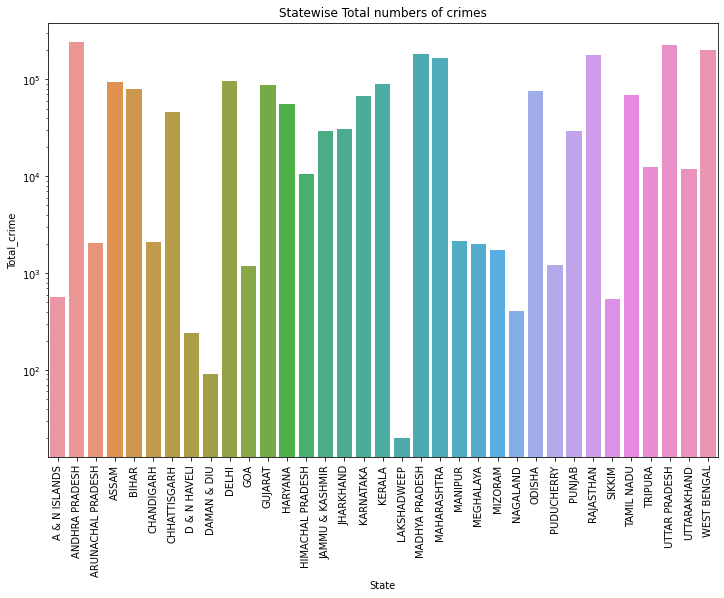

In [147]:
plt.figure(figsize = (12,8))
ax=sns.barplot(y="Total_crime",x="State",data=d1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Statewise Total numbers of crimes")
ax.set_yscale("log")

# Pie Chart Analysis Yearwise

In [26]:
d4 = crimeData.groupby(["Year"])[["Rape","Kidnapping","Dowry_deaths","Domestic_violence", "Trafficking of girls","Assault_to_modesty"]].sum()
d4 = d4.reset_index()
print(d4)

    Year   Rape  Kidnapping  Dowry_deaths  Domestic_violence  \
0   2001  16456       15609          6964              49308   
1   2002  16776       15399          6957              49372   
2   2003  16337       14093          6338              51914   
3   2004  18784       16459          7152              59375   
4   2005  19017       16856          6901              59643   
5   2006  19971       18480          7755              64856   
6   2007  21335       21583          8231              77717   
7   2008  21933       24075          8301              82731   
8   2009  21866       27396          8524              90829   
9   2010  22679       31535          8534              95445   
10  2011  24778       37650          8760             100710   
11  2012  25629       40422          8367             108512   

    Trafficking of girls  Assault_to_modesty  
0                    114               44462  
1                     76               44672  
2                     46  

# 1.Rapes

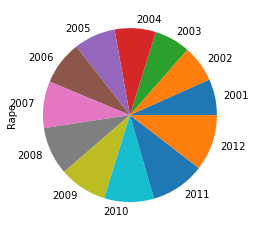

In [162]:
#d4.Rape.tolist()
d4.groupby(by=d4["Year"])["Rape"].max().plot(kind="pie")
plt.show()

# 2. Kidnapping 

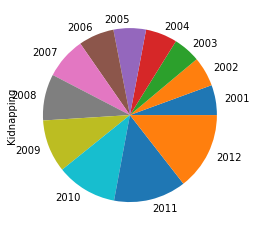

In [165]:
d4.groupby(by=d4["Year"])["Kidnapping"].max().plot(kind="pie")
plt.show()

# 3. Dowry_deaths

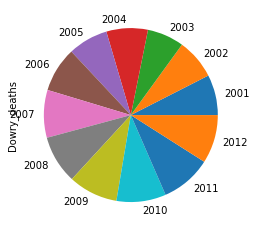

In [166]:
d4.groupby(by=d4["Year"])["Dowry_deaths"].max().plot(kind="pie")
plt.show()

# 4. Domestic_violence

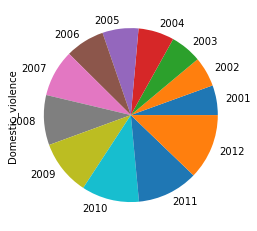

In [167]:
d4.groupby(by=d4["Year"])["Domestic_violence"].max().plot(kind="pie")
plt.show()

# 5. Assault_to_modesty

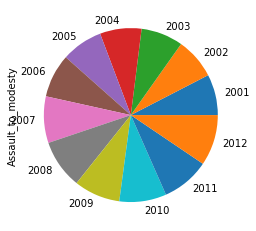

In [30]:
d4.groupby(by=d4["Year"])["Assault_to_modesty"].max().plot(kind="pie")
plt.show()

In [80]:
#d5= d4[(d4["Year"]>= 2001) & (d4["Year"]<= 2012)]
#d5

In [81]:
#d5.Year.values[0]-1

In [131]:
## Calculating the most and least occured crime through the data

d7= crimeData.sum(axis=0)[3:].reset_index()
d7.columns = ["Crime","Crime_count"]
d7=d7.sort_values(by='Crime_count',ascending=False)

d7

,Crime,Crime_count
3,Domestic_violence,890412
5,Assault_to_modesty,586430
1,Kidnapping,279557
0,Rape,245561
2,Dowry_deaths,92784
4,Trafficking of girls,893


# Total Number of Crimes in Each year

Text(0.5, 1.0, 'Total Number of Crimes in Each year')

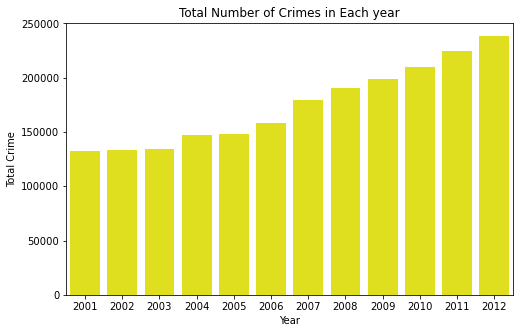

In [87]:
d6 = crimeData.groupby(["Year"])[["Rape","Kidnapping","Dowry_deaths","Domestic_violence", "Trafficking of girls","Assault_to_modesty"]].sum().sum(axis = 1)
d6= pd.DataFrame(d6.reset_index())
d6.columns = ["Year", "Total Crime"]
plt.figure(figsize = (8,5))
ms = sns.barplot(x="Year",y="Total Crime",data=d6, color="yellow")
plt.title("Total Number of Crimes in Each year")

# Slope chart study on different crimes

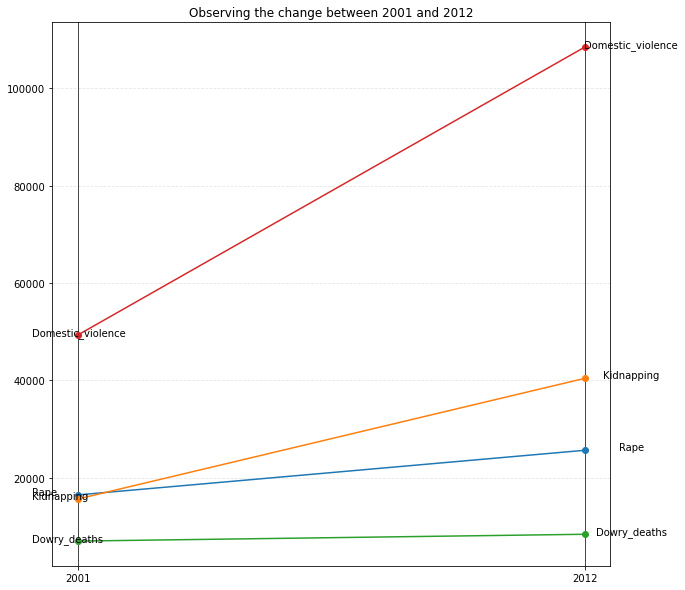

In [111]:
diff_crime = ["Rape", "Kidnapping", "Dowry_deaths", "Domestic_violence"]
d5 = d4[d4["Year"].isin([2001,2012])]

fig, ax = plt.subplots(1, figsize=(10,10))
ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)

for i,n in enumerate (diff_crime):
    plt.plot(d5.Year, d5[n],marker='o')
    plt.text(d5.Year.values[0]-1.0, d5[n].values[0], n)
    plt.text(d5.Year.values[1]+1.0, d5[n].values[1], n, ha='center')

plt.title("Observing the change between 2001 and 2012")
plt.xticks([2001,2012])
plt.show()